In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)

df = data.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
from sklearn.preprocessing import StandardScaler

features = df[['Longitude', 'Latitude', 'MedInc']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df['Cluster'] = clusters


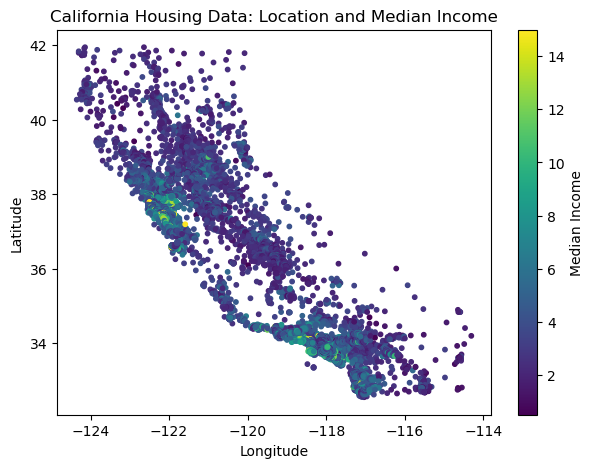

In [96]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(7, 5))
plt.scatter(df['Longitude'], df['Latitude'], c=df['MedInc'], cmap='viridis', marker='o', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Data: Location and Median Income')
plt.colorbar(label='Median Income')
plt.show()


For n_clusters = 2, the silhouette score is 0.5482304452184799
For n_clusters = 3, the silhouette score is 0.5179721838532693
For n_clusters = 4, the silhouette score is 0.43517979770599646
For n_clusters = 5, the silhouette score is 0.4100830999013529
For n_clusters = 6, the silhouette score is 0.3984653534071962
For n_clusters = 7, the silhouette score is 0.37225184832846725
For n_clusters = 8, the silhouette score is 0.3666693541000338
For n_clusters = 9, the silhouette score is 0.34617328321860785
For n_clusters = 10, the silhouette score is 0.35372734784052684


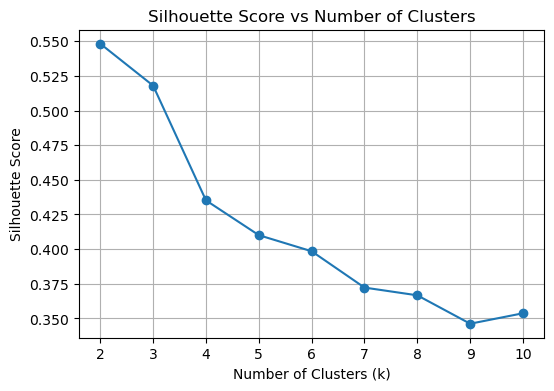

In [104]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

silhouette_scores = []

range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    
    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features) 
    
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}')

plt.figure(figsize=(6, 4))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [6]:
#Fitting Kmeans clustering with n_clusters = 2

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df['Cluster'] = clusters

In [114]:
#Kmeans clustering with latitude. longitude and median income(size) with k=2

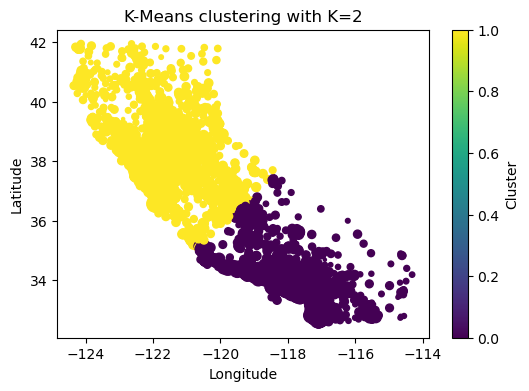

In [206]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


plt.figure(figsize=(6, 4))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', s=df['MedInc']*10, marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means clustering with K=2')
plt.colorbar(label='Cluster')
plt.show()


In [126]:
#Box plot chart

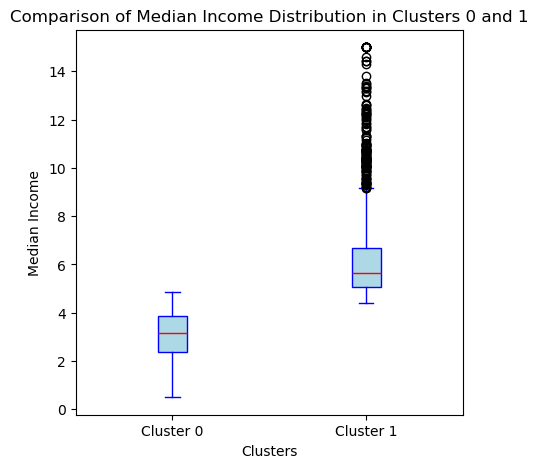

Cluster 0 Income Statistics:
 count    8163.000000
mean        3.104189
std         0.944940
min         0.499900
25%         2.367450
50%         3.148400
75%         3.869250
max         4.875000
Name: MedInc, dtype: float64

Cluster 1 Income Statistics:
 count    2289.000000
mean        6.193948
std         1.750059
min         4.420900
25%         5.049900
50%         5.641700
75%         6.695900
max        15.000100
Name: MedInc, dtype: float64


In [146]:
income_data = [cluster_0_income, cluster_1_income]

plt.figure(figsize=(5, 5))

plt.boxplot(income_data, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))

plt.title('Comparison of Median Income Distribution in Clusters 0 and 1')
plt.xlabel('Clusters')
plt.ylabel('Median Income')
plt.xticks([1, 2], ['Cluster 0', 'Cluster 1'])  # Rename x-tick labels

plt.show()

cluster_0_stats = cluster_0_income.describe()
cluster_1_stats = cluster_1_income.describe()

print("Cluster 0 Income Statistics:\n", cluster_0_stats)
print("\nCluster 1 Income Statistics:\n", cluster_1_stats)


In [118]:
#Inertia method

For n_clusters = 2, the inertia is 26860.983520934875
For n_clusters = 3, the inertia is 18987.366223806846
For n_clusters = 4, the inertia is 14547.72417484801
For n_clusters = 5, the inertia is 12632.865174008311
For n_clusters = 6, the inertia is 10039.01093799534
For n_clusters = 7, the inertia is 8732.982645840173
For n_clusters = 8, the inertia is 8163.094032473826
For n_clusters = 9, the inertia is 7149.206770234381
For n_clusters = 10, the inertia is 6454.482765495438


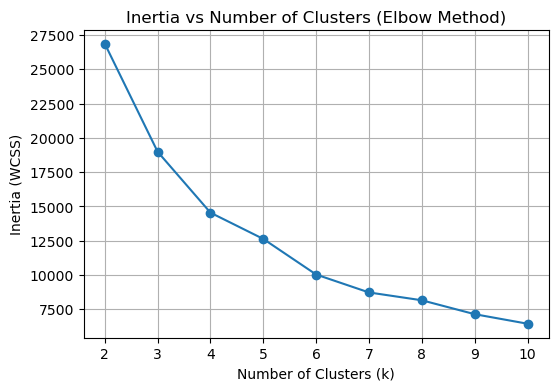

In [106]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []

range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features) 
    
    inertia_values.append(kmeans.inertia_)
    print(f'For n_clusters = {n_clusters}, the inertia is {kmeans.inertia_}')

plt.figure(figsize=(6, 4))
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.title('Inertia vs Number of Clusters (Elbow Method)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()


In [150]:
#Kmeans clustering with latitude, longitude and median income(size) with k=5

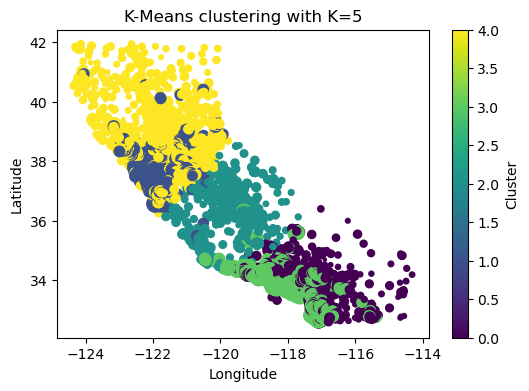

In [210]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


plt.figure(figsize=(6, 4))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', s=df['MedInc']*10, marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means clustering with K=5')
plt.colorbar(label='Cluster')
plt.show()


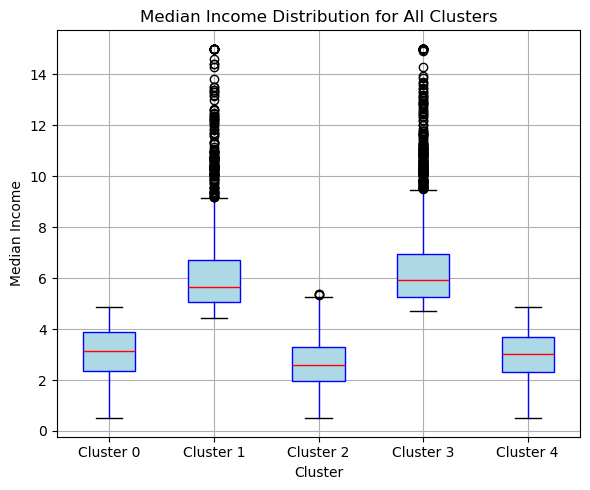

In [144]:
income_data = [cluster_0_income, cluster_1_income, cluster_2_income, cluster_3_income, cluster_4_income]

plt.figure(figsize=(6, 5))

plt.boxplot(income_data, patch_artist=True, labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'))

plt.title('Median Income Distribution for All Clusters')
plt.xlabel('Cluster')
plt.ylabel('Median Income')

plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
#DBSCAN cluster with eps = 0.4

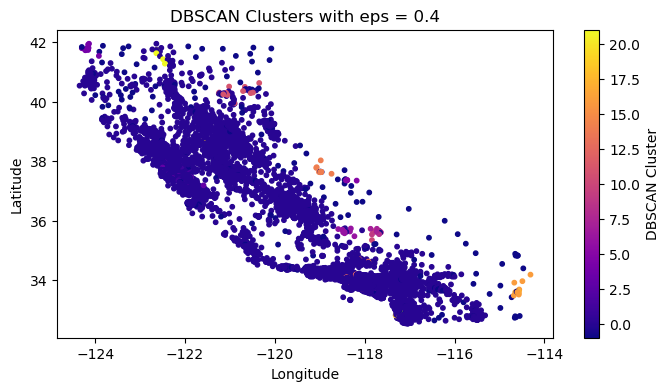

DBSCAN identified 23 clusters.


In [192]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=0.4, min_samples=5) 
df['DBSCAN_Cluster'] = dbscan.fit_predict(df[['Longitude', 'Latitude', 'MedInc']])


plt.figure(figsize=(8, 4))
plt.scatter(df['Longitude'], df['Latitude'], c=df['DBSCAN_Cluster'], cmap='plasma', s=10)
plt.colorbar(label='DBSCAN Cluster')
plt.title('DBSCAN Clusters with eps = 0.4')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


dbscan_clusters = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'] else 0)  
print(f"DBSCAN identified {dbscan_clusters} clusters.")


In [156]:
#Fitting K=10 in k-means clustering for latitude,Longitude and median income

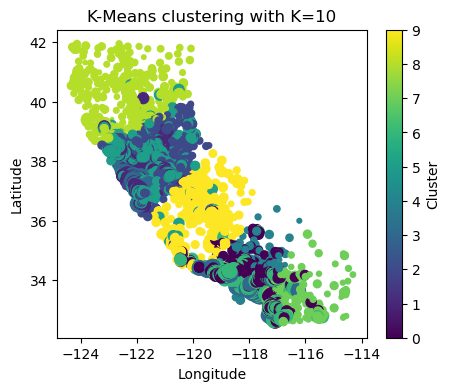

In [182]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


plt.figure(figsize=(5, 4))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', s=df['MedInc']*10, marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means clustering with K=10')
plt.colorbar(label='Cluster')
plt.show()

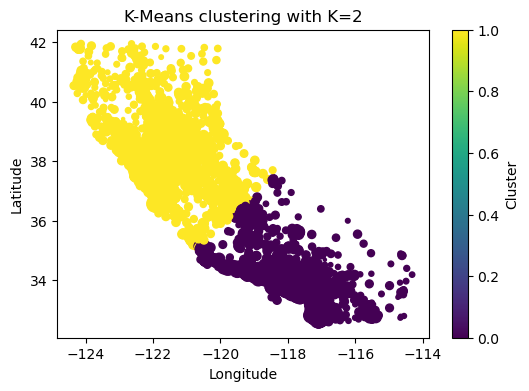

In [202]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


plt.figure(figsize=(6, 4))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', s=df['MedInc']*10, marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means clustering with K=2')
plt.colorbar(label='Cluster')
plt.show()